# Read the Gradient Descent Algorithm **first**

In [7]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# importing a simple regression dataset
X,y = make_regression( n_samples = 15, n_features = 1, n_informative = 1,
                      n_targets = 1,noise=10, random_state = 83)
X # showing the input and output
y

array([-47.3975475 ,   0.5839787 , -51.65592031, -56.30543186,
        69.42631394, -10.03026498, -49.17460787,  63.82073075,
       -35.50975707,  57.90062129, -20.70993044,  18.28553862,
        38.75200393,  35.85118215, -18.54613536])

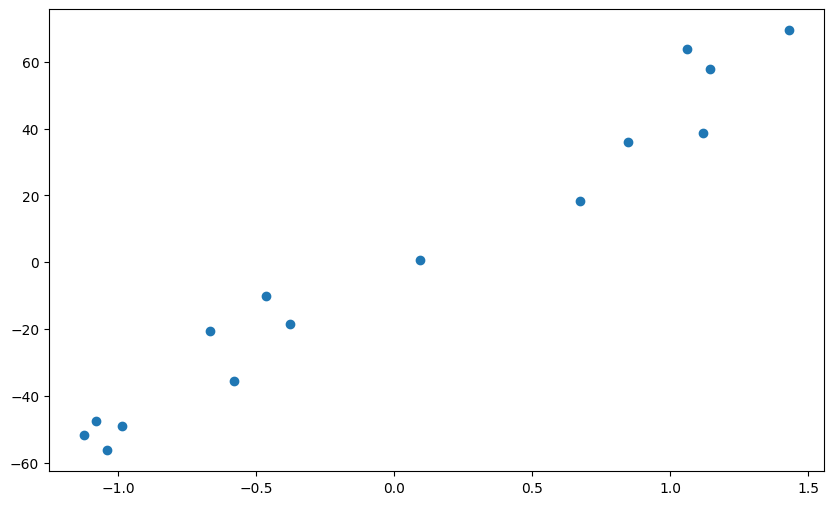

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

# **Linear Regression model from sklearn**
As m is fixed, we will take the value and tries to find proper b with our GD algorithm

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [13]:
print(f'm = {lreg.coef_}')
print(f'b = {lreg.intercept_}')

m = [46.42197217]
b = -0.4935883537411853


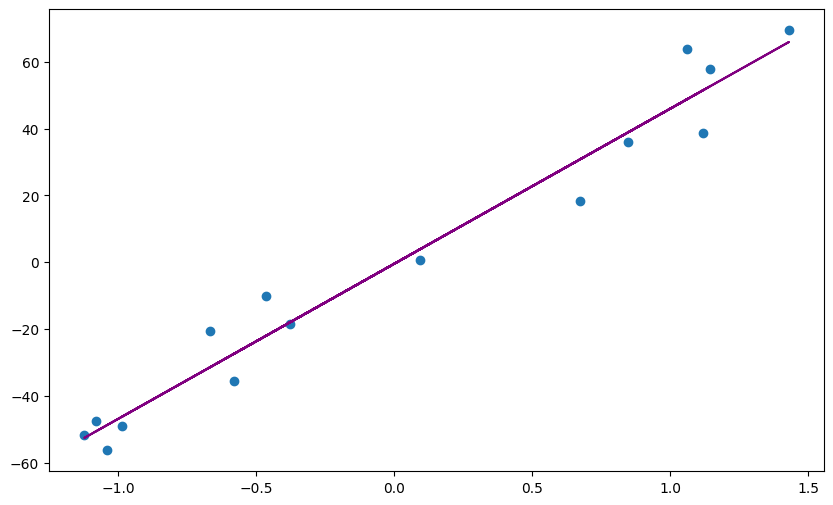

In [14]:
m = lreg.coef_ #coef_ return all the weights found by sklearn's linear regression model
b = lreg.intercept_ #intercept_ return the bias value
y_pred = lreg.predict(X)
#print(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple')
plt.show()

# Gradient Descent Algorithm in **action**
m = [46.42197217] b = -0.4935883537411853 (Actual values from sklearn)

As we consider m is known at first we take m = [46.42197217] and try to find the correct value of b by using GD Algorithm

[-20.16202743  34.38555982 -22.12014006 -18.26292864  96.38056112
   8.42182629 -15.70261332  79.28954936   3.15734218  83.06424579
  -0.88841605  61.33371642  81.88005502  69.42677916  12.49108965]


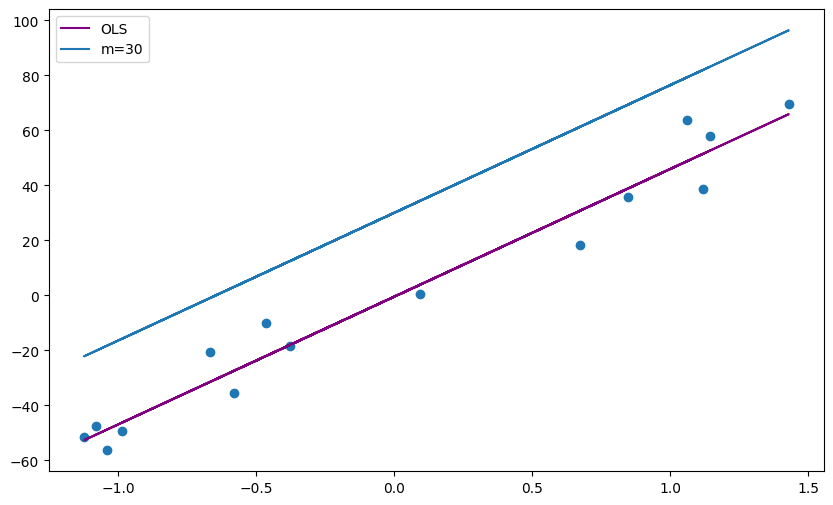

In [15]:
m = 46.42197217
b = 30 # Take a random value
y_pred_new = (m*X.ravel()+b) # prediction for the value
print(y_pred_new)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS') # Actual line from sklearn
plt.plot(X,y_pred_new, label='m=30')# our models predicted line
plt.legend()
plt.show()

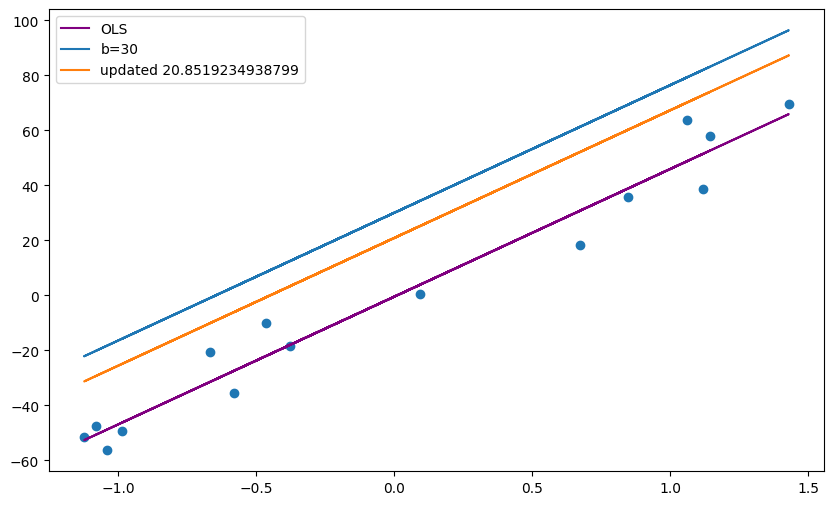

In [16]:
## Running the same code for the 2nd time and we can see improvement
### The line move from blue to the orange line
### See the value changes of b in the figure below

lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b = b - lr*slope

y_pred_newest = m*X+b

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS')
plt.plot(X,y_pred_new, label='b=30')
plt.plot(X,y_pred_newest, label=f'updated {b}')
plt.legend()
plt.show()

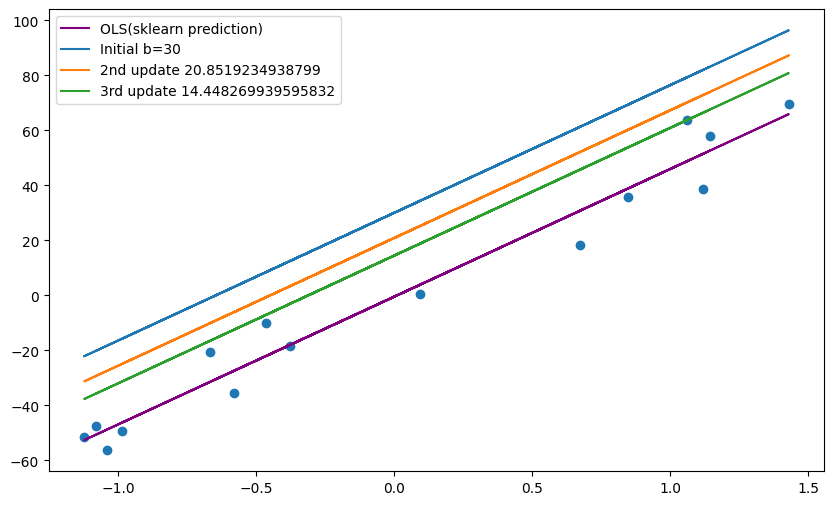

In [17]:
lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b_last = b - lr*slope

y_pred_newest_last = m*X+b_last

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS(sklearn prediction)')
plt.plot(X,y_pred_new, label='Initial b=30')
plt.plot(X,y_pred_newest, label=f'2nd update {b}')
plt.plot(X,y_pred_newest_last, label=f'3rd update {b_last}')
plt.legend()
plt.show()

# **Visualize how the loss look like and how GD performing for minimizing the loss**

In [18]:
all_b = np.arange(-20,20,0.5) #random values of b from -20 to 20
loss = [] # it will store the losses for every b,loss is a list
for b in all_b:
  loss.append(np.power(np.sum(y-m*X.ravel()-b),2)) # I use OLS here (y-y_hat)^2 or (y-mx-b)^2

In [19]:
loss = np.array(loss) # converting loss list to numpy array to plot

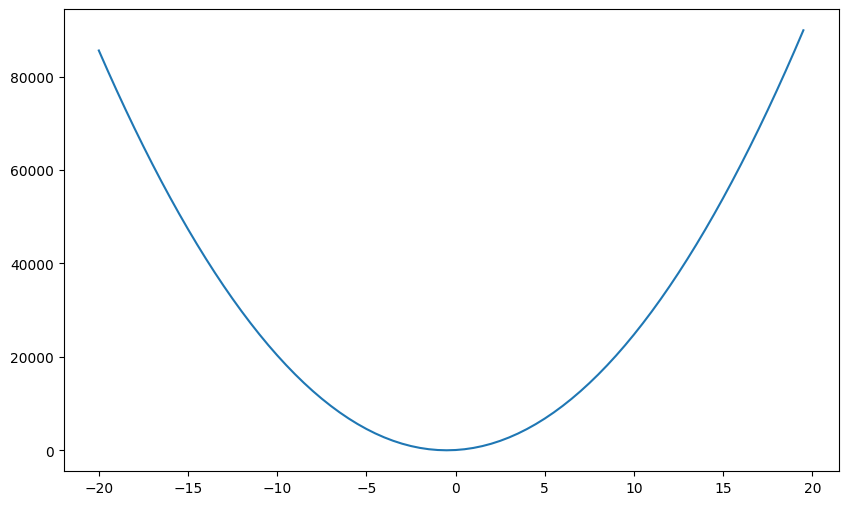

In [20]:
# this shows how are loss function looks like
plt.figure(figsize=(10,6))
plt.plot(all_b,loss)
plt.show()

# **Final GD algorithm when m is known**

Look how each time the line updates towards the Actual Red line and How loss minimized by GD algorithm(Second plot)

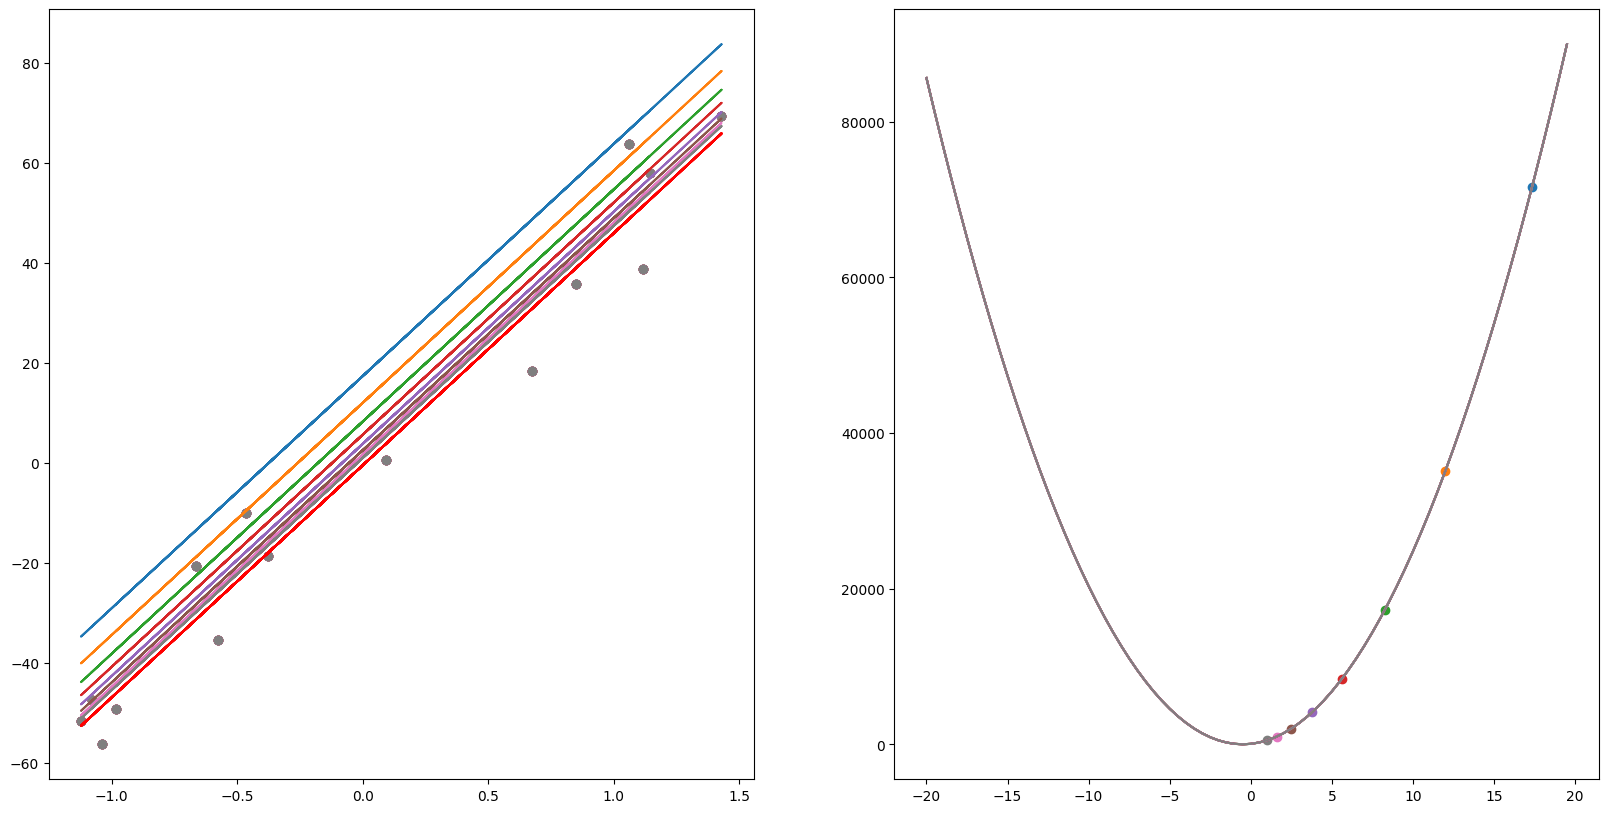

In [21]:
m = lreg.coef_   # lr.coef_  from above algorithm
b  = 25
lrate = 0.01
slope = -2*np.sum(y-m*X.ravel()-b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


for i in range(8):
    slope = -2*np.sum(y-m*X.ravel()-b)
    b = b - lrate*slope
    l = np.power(np.sum(y-m*X.ravel()-b),2) # loss
    y_pred_newest = m*X.ravel()+b
    ax1.plot(X,y_pred_newest)
    ax1.scatter(X,y)
    ax1.plot(X,lreg.predict(X),color='red', label='OLS') # Actaul line
    ax2.plot(all_b,loss)
    ax2.scatter(b,l)

plt.show()

Actual GD algorithm When both b and m is **unknown**

In [22]:
from sklearn.datasets import make_regression

In [23]:
X,y = make_regression(n_samples = 100, n_features = 1,  n_informative = 1,
                      n_targets = 1,noise=10, random_state = 13)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

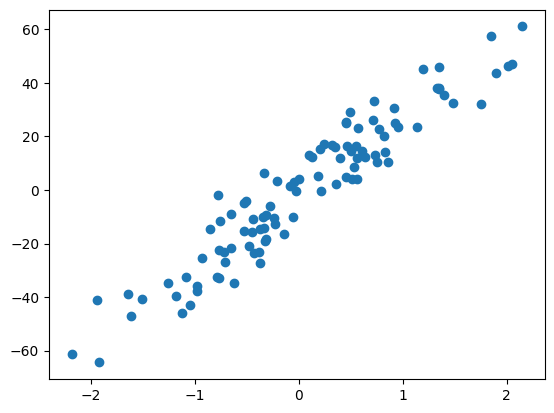

In [25]:
plt.scatter(X,y)
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [28]:
m = lreg.coef_
b = lreg.intercept_
print(f'm={m} b={b}')
line = m*X.reshape(100)+b
print(line[0:2])

m=[27.71819977] b=-1.1473722793384897
[-20.89355896 -13.26426289]


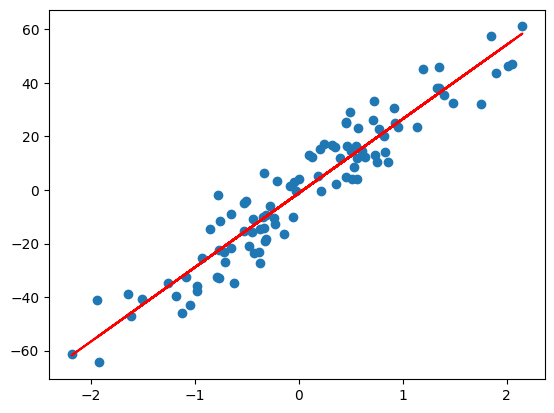

In [29]:
plt.scatter(X,y)
plt.plot(X,lreg.predict(X),color='red')
plt.show()

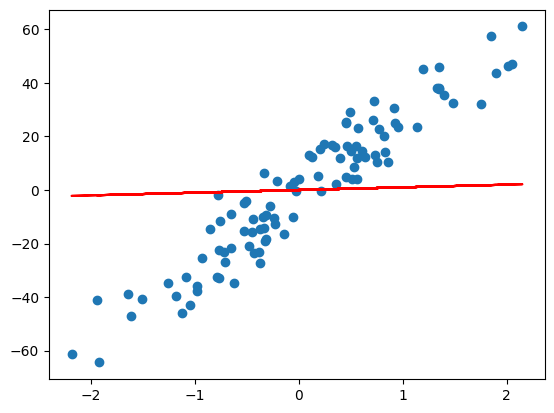

In [30]:
# we and the same m and b by our algorithm
# m=[27.71819977] b=-1.1473722793384897

m = 1
b = 0
initial_line=(m*X+b).reshape(100)
plt.scatter(X,y)
plt.plot(X,initial_line,color='red')
plt.show()

In [31]:
# Initial values
m = -56
b = 10
lr = 0.001
for i in range(10000):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718199765142987   b:-1.1473722793384886


In [32]:
#Some Aniamtion
from matplotlib.animation import FuncAnimation

In [33]:
# Initial values
m = 100
b = -45
lr = 0.001

all_b = []
all_m = []

for i in range(100):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m
  all_b.append(b)
  all_m.append(m)

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718200403957788   b:-1.147372528650443


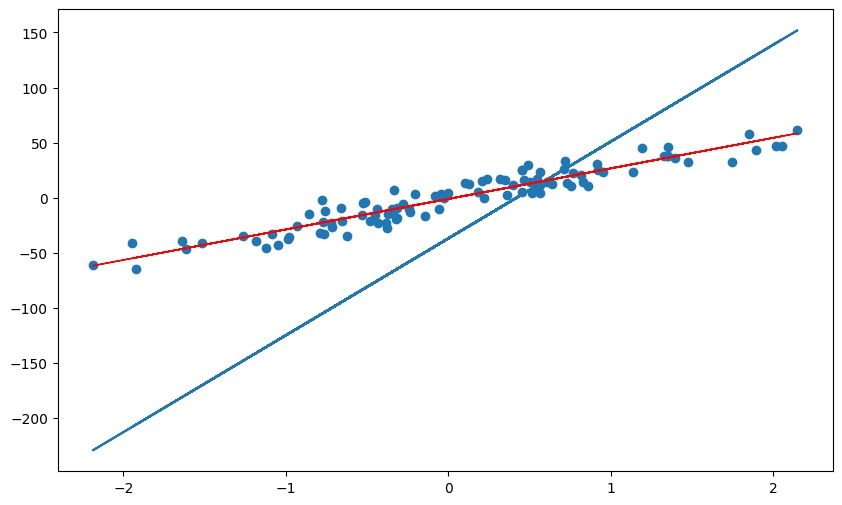

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
# slope_b = -2*np.sum(y-all_m[0]*X.ravel()-all_b[0])
# slope_m = -2*np.sum((y-all_m[0]*X.ravel()-all_b[0])*X.ravel())
line, = ax.plot(X,X*all_m[0]+all_b[0])
ax.scatter(X,y)
ax.plot(X, lreg.predict(X), color='red',linewidth=1)

def update(i):
  # slope_b = -2*np.sum(y-all_m[i]*X.ravel()-all_b[i])
  # slope_m = -2*np.sum((y-all_m[i]*X.ravel()-all_b[i])*X.ravel())
  line.set_ydata(X*all_m[i]+all_b[i])
  line.set_label(f'b:{all_b[i]} m:{all_m[i]}')
  ax.set_xlabel(f'Epoch : {i+1}, m:{all_m[i]}, b:{all_b[i]}')

anim = FuncAnimation(fig,update,frames=25,interval=300)
plt.show()

In [35]:
from matplotlib import rc # https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
rc('animation', html='jshtml')
anim

**Type to plot to 3D loss**

In [36]:
from matplotlib import pyplot as plt
import numpy as np

In [37]:
np.random.seed(83)
x = np.random.normal(3,1,50) #mean, std, size
y = np.random.normal(3,1,50) #peak, flatness, size
z = np.random.normal(3,1,50)

In [38]:
x[0:5],y[0:5]

(array([3.84931289, 1.87725278, 4.14308469, 3.67497599, 2.53517327]),
 array([2.56561395, 2.38851345, 3.28123298, 3.77017387, 3.28525277]))

In [39]:
plt.rcParams['figure.figsize'] = (8,6)

<Axes3D: >

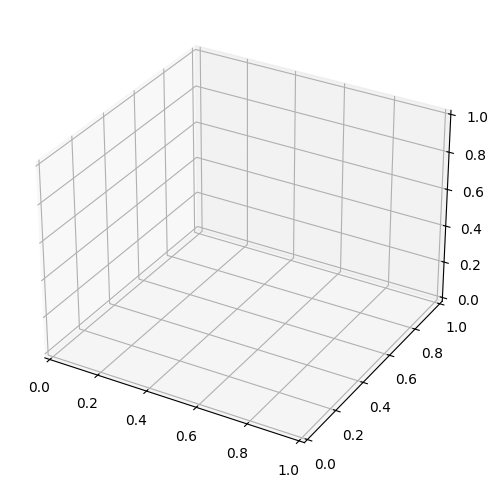

In [40]:
plt.axes(projection='3d')

Text(0.5, 0, 'z')

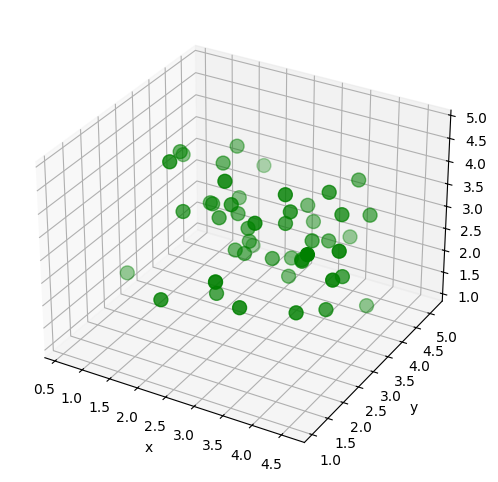

In [41]:
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,s=100,color='green') #ax.plot3D for lines
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [42]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)

def find_z(X,Y):
  return 50+(X**2+y**2)

In [43]:
X, Y = np.meshgrid(x,y)
Z = find_z(X,Y)

In [44]:
X.shape,Y.shape, Z.shape

((50, 50), (50, 50), (50, 50))

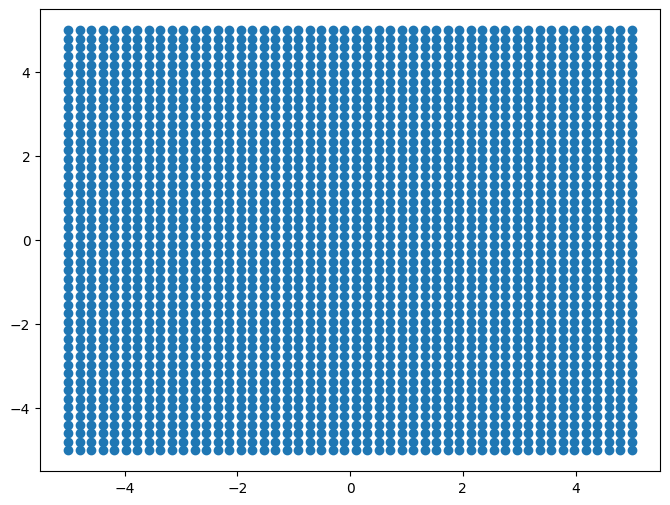

In [45]:
plt.scatter(X,Y)

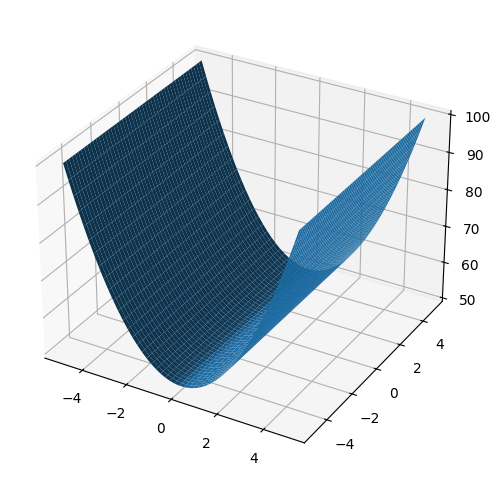

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

In [47]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 40, n_features = 1,  n_informative = 1,
                      n_targets = 1,noise=10, random_state = 13)

In [48]:
x = np.linspace(-25,25,40)
y = np.linspace(-25,25,40)

In [49]:
m,b=np.meshgrid(x,y)

In [50]:
loss=[]
for mm,bb in zip(m,b):
  loss.append(np.power(np.sum(y-mm*X.ravel()-bb),2))

In [51]:
m.shape

(40, 40)

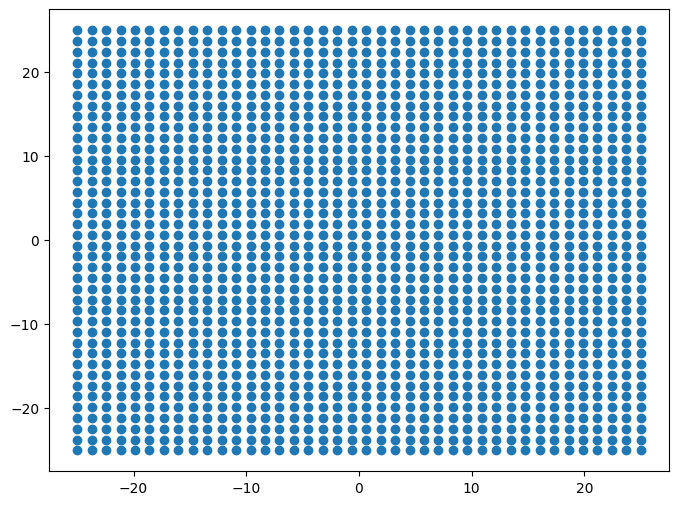

In [52]:
plt.scatter(m,b)

In [53]:
loss = np.array(loss)
loss = np.meshgrid(loss,loss)
loss = loss[0]

((40, 40), (40, 40), (40, 40))

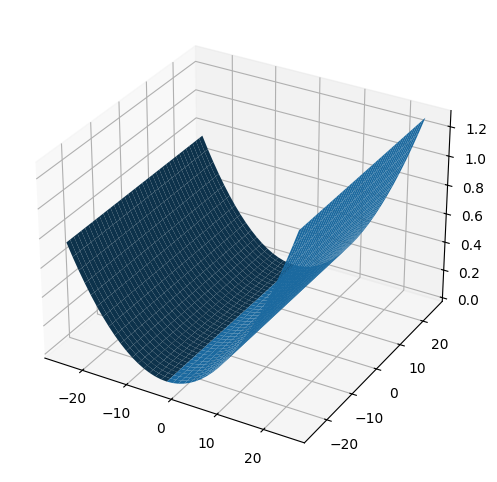

In [54]:
ax = plt.axes(projection='3d')
ax.plot_surface(m,b,loss)
m.shape,b.shape,loss.shape

In [55]:
# Initial values
mm = 20
bb = -1
lr = 0.01

all_b = []
all_m = []
losses = []

for i in range(100):
  slope_b = -2*np.sum(y-mm*X.ravel()-b)
  slope_m = -2*np.sum((y-mm*X.ravel()-bb)*X.ravel())
  loss_mb = np.power(np.sum(y-mm*X.ravel()-bb),2)
  bb = bb - lr*slope_b
  mm = mm - lr*slope_m
  all_b.append(bb)
  all_m.append(mm)
  losses.append(loss_mb)

In [56]:
from matplotlib import cm

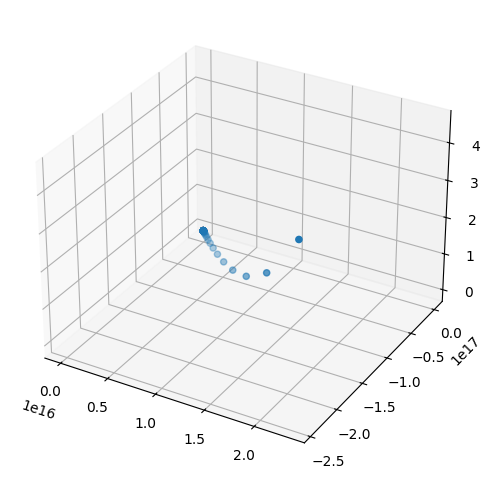

In [57]:
ax = plt.axes(projection='3d') # to work in 3d
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines
ax.plot_surface(m,b,loss,cmap=cm.hot)

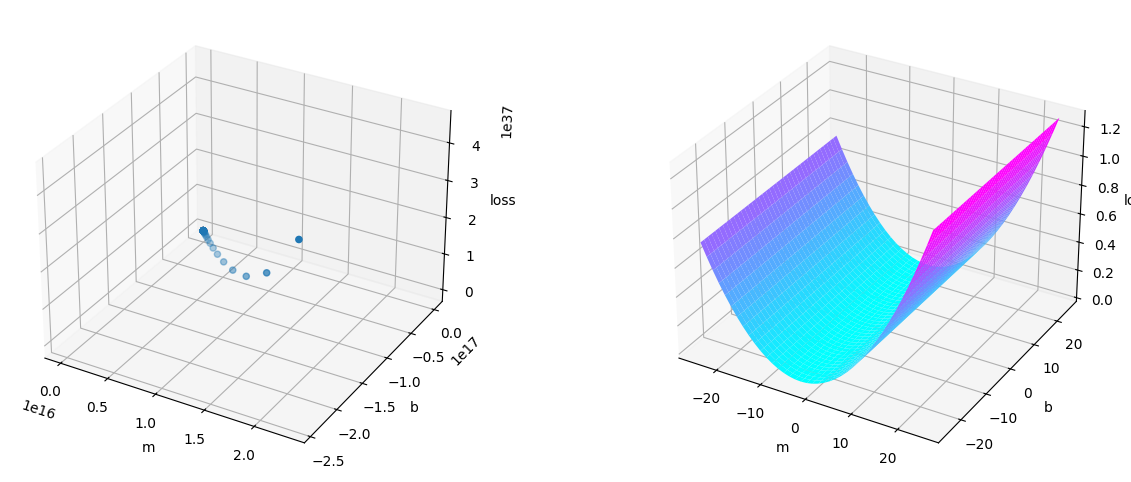

In [58]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')



ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(m,b,loss,cmap=cm.cool)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')

plt.show()

# **Testing Types of Gradient Descent**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


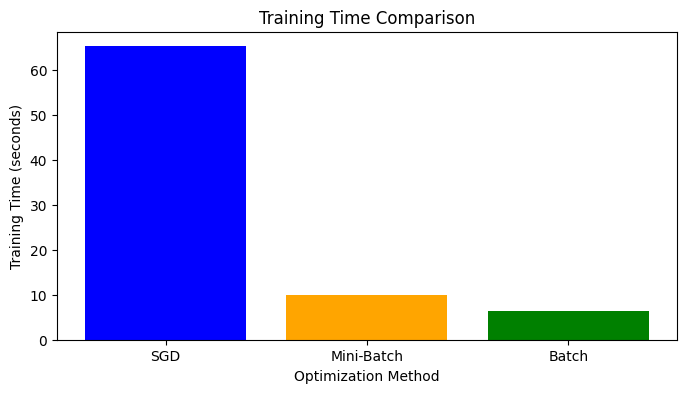

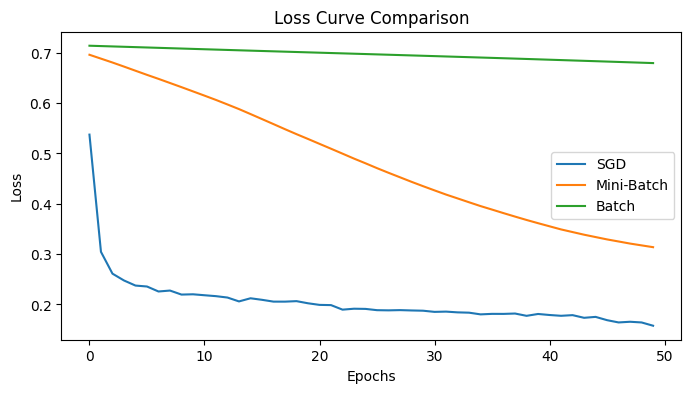

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Generate random dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(2,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile and train the model with different optimization strategies
def train_model(optimizer, batch_size=None):
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    end_time = time.time()

    training_time = end_time - start_time
    return history, training_time

# Stochastic Gradient Descent (batch_size=1)
sgd = SGD(learning_rate=0.01)
history_sgd, time_sgd = train_model(SGD(learning_rate=0.01), batch_size=1)

# Mini-Batch Gradient Descent (batch_size=32)
history_mini_batch, time_mini_batch = train_model(SGD(learning_rate=0.01), batch_size=32)

# Batch Gradient Descent (batch_size=all samples)
history_batch, time_batch = train_model(SGD(learning_rate=0.01), batch_size=len(X_train))

# Plot the training time for each method
plt.figure(figsize=(8, 4))
methods = ['SGD', 'Mini-Batch', 'Batch']
times = [time_sgd, time_mini_batch, time_batch]
plt.bar(methods, times, color=['blue', 'orange', 'green'])
plt.xlabel('Optimization Method')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()

# Plot the loss curve for each method
plt.figure(figsize=(8, 4))
plt.plot(history_sgd.history['loss'], label='SGD')
plt.plot(history_mini_batch.history['loss'], label='Mini-Batch')
plt.plot(history_batch.history['loss'], label='Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Generate random dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(2,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Compile and train the model with different optimization strategies
def train_model(optimizer, batch_size=None):
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)
    end_time = time.time()

    training_time = end_time - start_time
    return history, training_time

# Stochastic Gradient Descent (batch_size=1)
print('Stochastic Gradient Descent')
sgd = SGD(learning_rate=0.01)
history_sgd, time_sgd = train_model(SGD(learning_rate=0.01), batch_size=1)

# Mini-Batch Gradient Descent (batch_size=32)
print('Mini-Batch Gradient Descent')
history_mini_batch, time_mini_batch = train_model(SGD(learning_rate=0.01), batch_size=32)

# Batch Gradient Descent (batch_size=all samples)
print('Batch Gradient Descent')
history_batch, time_batch = train_model(SGD(learning_rate=0.01), batch_size=len(X_train))

# # Plot the training time for each method
# plt.figure(figsize=(8, 4))
# methods = ['SGD']
# times = [time_sgd, time_mini_batch, time_batch]
# plt.bar(methods, times, color=['blue', 'orange', 'green'])
# plt.xlabel('Optimization Method')
# plt.ylabel('Training Time (seconds)')
# plt.title('Training Time Comparison')
# plt.show()

# # Plot the loss curve for each method
# plt.figure(figsize=(8, 4))
# plt.plot(history_sgd.history['loss'], label='SGD')
# plt.plot(history_mini_batch.history['loss'], label='Mini-Batch')
# plt.plot(history_batch.history['loss'], label='Batch')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Loss Curve Comparison')
# plt.legend()
# plt.show()


Stochastic Gradient Descent
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6893 - loss: 0.6150 - val_accuracy: 0.8800 - val_loss: 0.4179
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - loss: 0.3803 - val_accuracy: 0.8700 - val_loss: 0.2899
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.2614 - val_accuracy: 0.8700 - val_loss: 0.2720
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9063 - loss: 0.2251 - val_accuracy: 0.8800 - val_loss: 0.2589
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9210 - loss: 0.2195 - val_accuracy: 0.8900 - val_loss: 0.2362
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.2257 - val_accuracy: 0.8800 - val_loss: 0.2475
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.2678 - val_accuracy: 0.9100 - val_loss: 0.2279
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8989 - loss: 0.1985 - val_accuracy: 0.8900 - val_

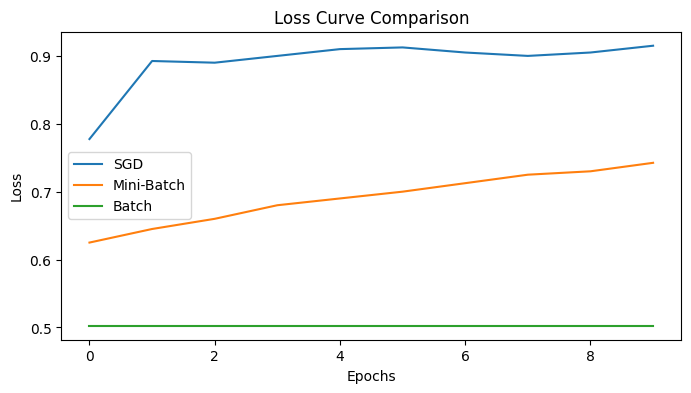

In [61]:
# Plot the loss curve for each method
plt.figure(figsize=(8, 4))
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_mini_batch.history['accuracy'], label='Mini-Batch')
plt.plot(history_batch.history['accuracy'], label='Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.legend()
plt.show()

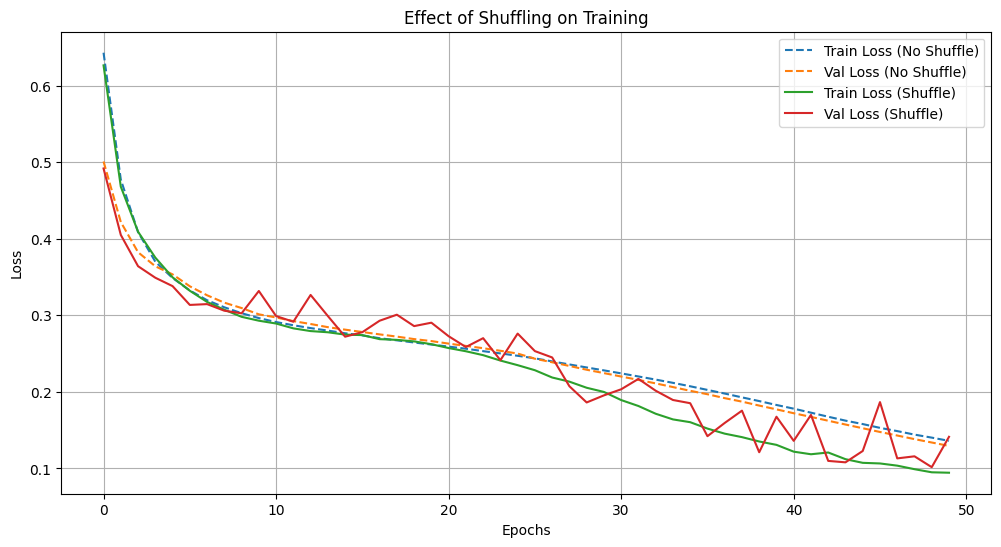

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Generate a synthetic dataset
np.random.seed(42)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network
def create_model():
    model = Sequential([
        Dense(10, activation='relu', input_shape=(2,)),
        Dense(5, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train without shuffling
model_no_shuffle = create_model()
history_no_shuffle = model_no_shuffle.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    shuffle=False,
    verbose=0,
    validation_data=(X_test, y_test)
)

# Train with shuffling
model_shuffle = create_model()
history_shuffle = model_shuffle.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=0,
    validation_data=(X_test, y_test)
)

# Visualize the training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss for no shuffling
plt.plot(history_no_shuffle.history['loss'], label='Train Loss (No Shuffle)', linestyle='--')
plt.plot(history_no_shuffle.history['val_loss'], label='Val Loss (No Shuffle)', linestyle='--')

# Plot loss for shuffling
plt.plot(history_shuffle.history['loss'], label='Train Loss (Shuffle)')
plt.plot(history_shuffle.history['val_loss'], label='Val Loss (Shuffle)')

plt.title('Effect of Shuffling on Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
